In [78]:
#————————————————————#
#  Import Packages   #
#————————————————————#

import math 
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#———————————————————————#
#Create the Muon Decay  #
#Simulation Class       #
#———————————————————————#
class MCMuDecay(object):

    #—————————————————————————————————————————————————————————
    #Class constructor, the time range is 0 to 10 microseconds
    #—————————————————————————————————————————————————————————
    def __init__(self, T_range):
        self.low_T_range = T_range[0]
        self.high_T_range = T_range[1]
        self.sample_size = 1000
        self.mu_lifetime = 2.2 #This is the true muon lifetime (in microseconds)

    #—————————————————————————————————————————————————————————
    #The exponential Distribution that describes the muon decay
    #—————————————————————————————————————————————————————————
    def mu_exp(self, t):
        return ( (1/self.mu_lifetime)*np.exp(-t/self.mu_lifetime) )

    #—————————————————————————————————————————————————————————
    #Function returning single random generated exponential muon
    #decay time
    #—————————————————————————————————————————————————————————
    def mu_random_single_lt(self):
        return ( np.random.exponential(scale=self.mu_lifetime) )
    
    #—————————————————————————————————————————————————————————
    #Function which gives an array of randomized mu decay times
    #—————————————————————————————————————————————————————————
    def mu_sample_decayT(self):
        #first create an empty np array 
        mu_sample_decayT_list = []
        #while loop making sure to run until the list has 1000 entries
        while len(mu_sample_decayT_list)<self.sample_size:
            single_random_mu_lt = self.mu_random_single_lt()
            #compare the random generated decay time is within the range
            if (single_random_mu_lt>self.low_T_range) and (single_random_mu_lt<self.high_T_range):
                mu_sample_decayT_list.append(single_random_mu_lt)
        #convert the list into a np array
        mu_sample_decayT_array = np.array(mu_sample_decayT_list)
        return mu_sample_decayT_array

    #—————————————————————————————————————————————————————————————————
    #Function that estimates the lifetime of the simulated muon sample,
    #which is the average of all measured decay time
    #—————————————————————————————————————————————————————————————————
    def est_sim_mu_lifetime(self):
        return self.mu_sample_decayT().mean()
        

In [97]:
#———————————————————————#
# Main function used to #
# run the class and     #
# produce relevant      #
# results.              #
#———————————————————————#

def main():
    #Define the relevant parameters
    T = np.linspace(0, 10, num=1000)
    T_range = [0, 10]

    #Initialize the class
    MCMuSim = MCMuDecay(T_range)

    #from the class, obtain the simulated sample of 1000 muon decay lifetime
    mu_sim_decay_sample = MCMuSim.mu_sample_decayT()

    #From the class, obtain the estimated muon lifetime for the simulated muon dataset
    mu_sim_est_lifetime = MCMuSim.est_sim_mu_lifetime()
    
    #Plot histogram to check the simulated 1000 muon decays and also plot the predicted true muon decay time
    plt.hist(mu_sim_decay_sample, density=True, bins=25, label="Simulated Sample Distribution")
    plt.plot(T, MCMuSim.mu_exp(T), label="Predicted True Distribution")
    plt.xlabel("Muon Life Time ($\mu s$)")
    plt.ylabel("Probability")
    plt.title("Distribution of Muon Sample Decay Times")
    plt.axvline(2.2, 0, color="r", linestyle="dashed", label="True Muon Lifetime")
    plt.axvline(mu_sim_est_lifetime, 0, color="g", linestyle="dashed", label="Estimated Muon Lifetime" )
    plt.legend()
    plt.show()




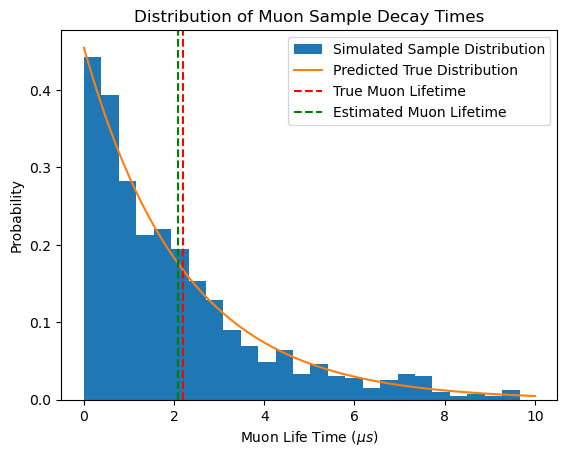

In [98]:
main()